In [1]:
import tensorflow

In [2]:
import gym
import json
import datetime as dt

from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise
from stable_baselines3 import DDPG, A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.utils import set_random_seed

from env.SoccerActionsEnv import SoccerActionsEnv

import pandas as pd
import numpy as np

import lib.draw as draw
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [3]:
def make_env(rank, seed=0):
    def _init():
        env = SoccerActionsEnv(randomized_start=True, end_on_xg=True)
        return env
    set_random_seed(seed)
    return _init

In [4]:
if __name__ == '__main__':
    env = SubprocVecEnv([make_env(i) for i in range(16)])

    n_actions = env.action_space.shape[-1]

    t1 = time.time()

    model = A2C('MlpPolicy', env, learning_rate=0.001, use_sde=True, sde_sample_freq=-1)
    model.learn(total_timesteps=100000, log_interval=10000)
    print(time.time() - t1)

    saving_rewards = []
    env = SoccerActionsEnv(randomized_start=True, end_on_xg=True)
    obs = env.reset()
    for i in range(10000):
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        #env.render()
        if done:
            saving_rewards.append(rewards)
            env.reset()
    print(np.mean(saving_rewards))

45.5861918926239
C:\Users\Tiago Mendes-Neves\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Tiago Mendes-Neves\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
0.015158611320044785


In [5]:
scouter_array = np.array([[i, j] for i in np.arange(0,1,0.01) for j in np.arange(0,1,0.0177)])
decisions = []
for array in tqdm(scouter_array):
    action, _ = model.predict(array)
    decisions.append(action)
scouter = pd.DataFrame(scouter_array * 100, columns=['x','y'])
scouter[['action','r','a']] = decisions

100%|██████████| 5700/5700 [00:03<00:00, 1582.52it/s]


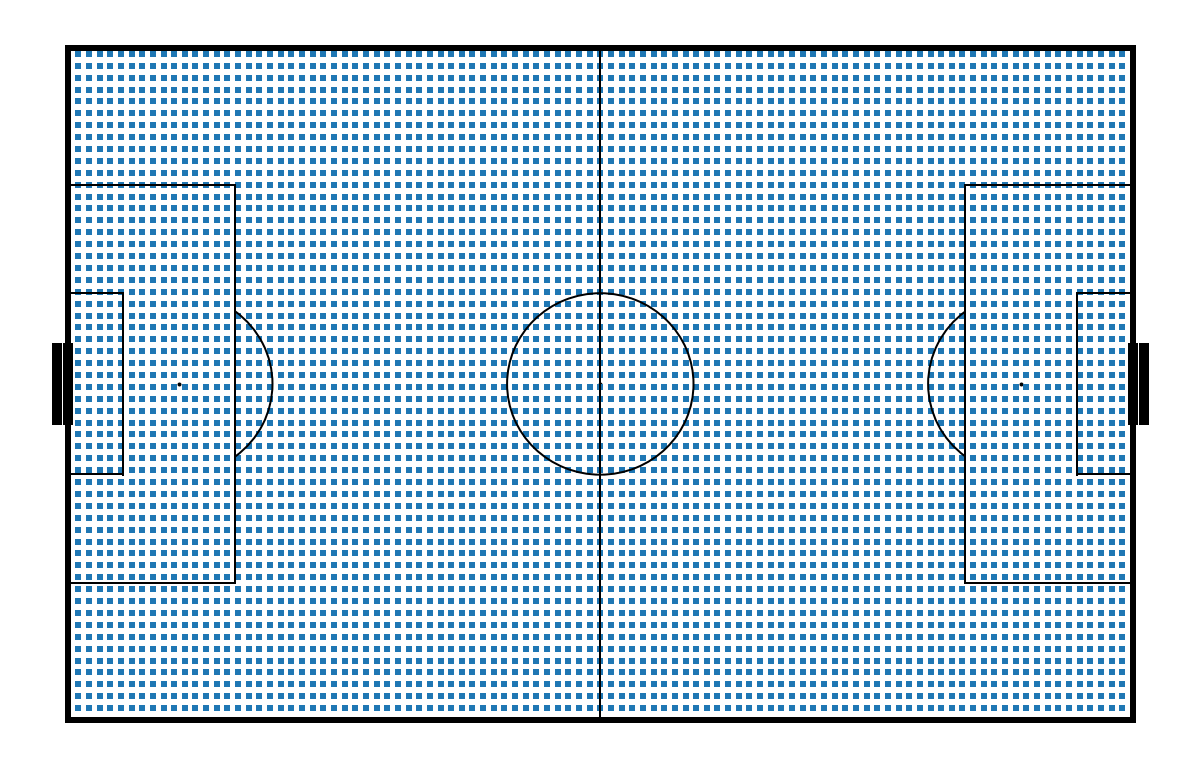

In [6]:
draw.pitch()
scouter_shots = scouter[scouter.action < 0.5]
scouter_passes = scouter[scouter.action >= 0.5]
plt.scatter(scouter_shots.x, scouter_shots.y, s = 10, c = 'C0', marker = 's', linewidth=0);
plt.scatter(scouter_passes.x, scouter_passes.y, s = 10, c = 'C1', marker = 's', linewidth=0);

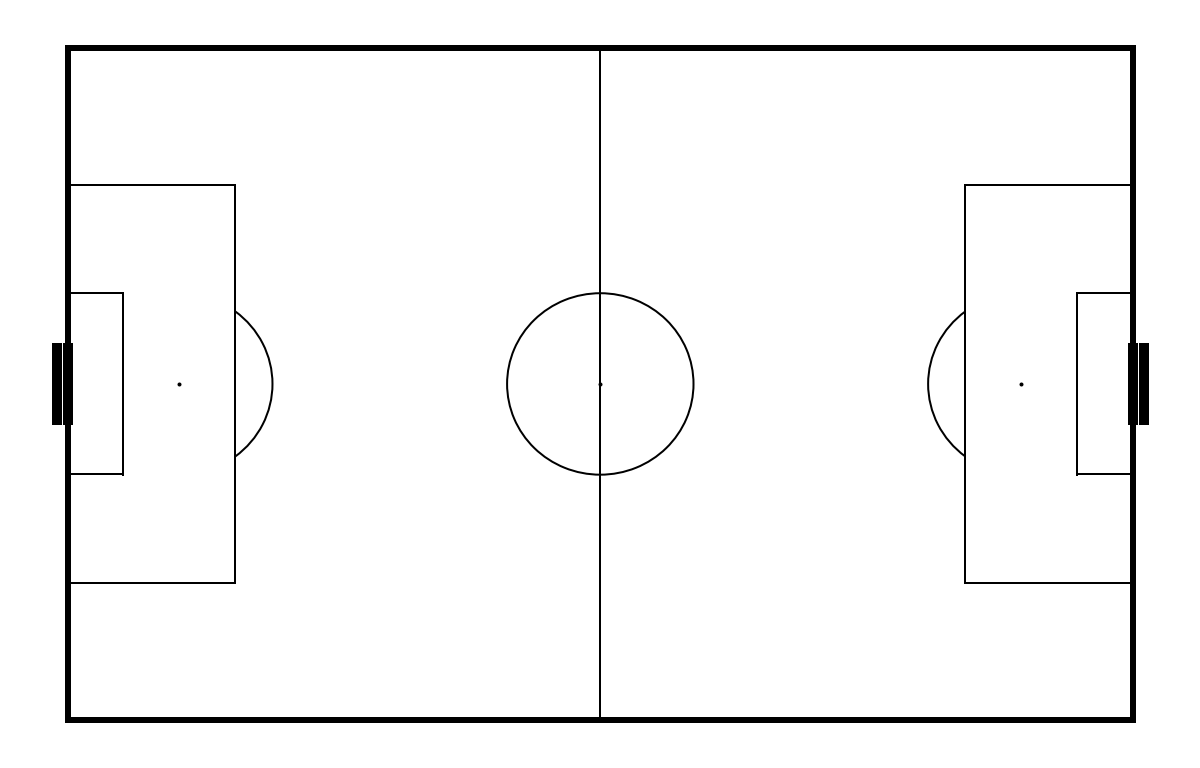

In [7]:
draw.pitch()
plt.scatter(scouter.x, scouter.y, s = scouter.r, c = 'C0', alpha = 0.5, marker = 's', linewidth=0);

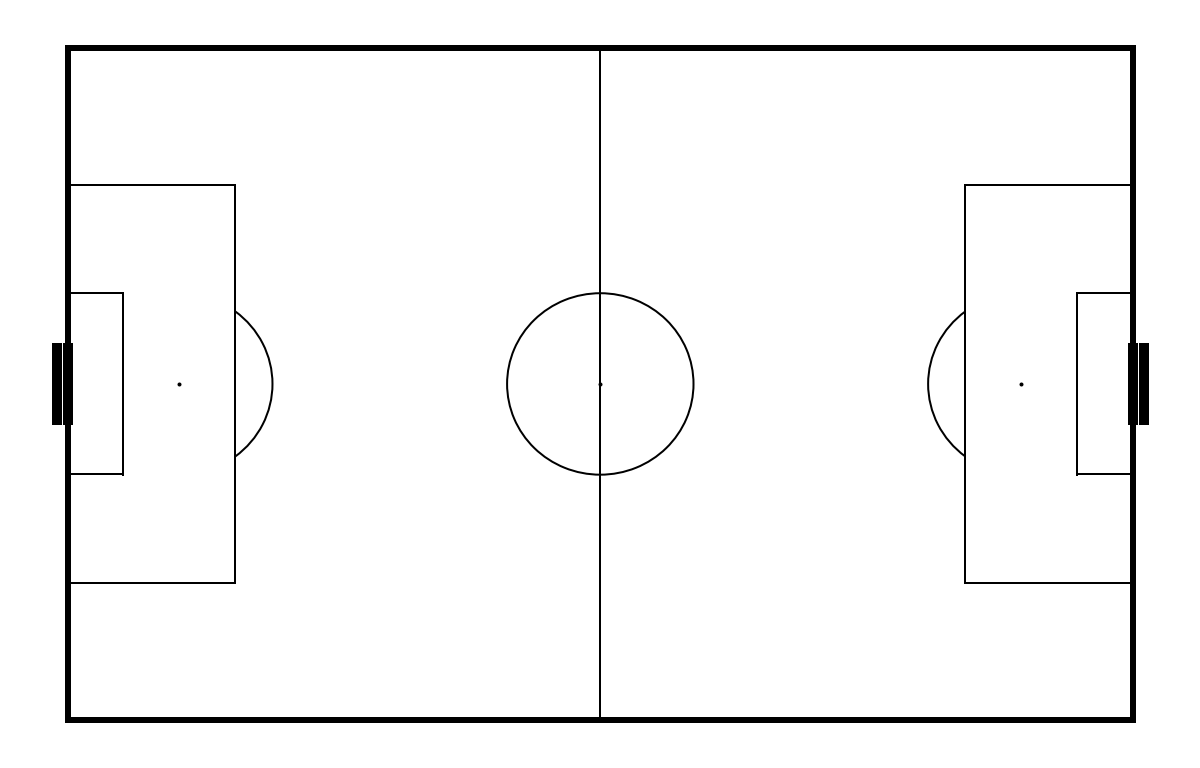

In [8]:
draw.pitch()
for i, row in scouter_passes.iterrows():
    if i%6 == 0:
        plt.arrow(row['x'], row['y'], row.r/abs(row.r) * np.cos((row.a - 0.5) * 2 * np.pi), row.r/abs(row.r) * np.sin((row.a - 0.5) * 2 * np.pi), length_includes_head = True, head_width = .5, head_length = .5, color = 'C1')

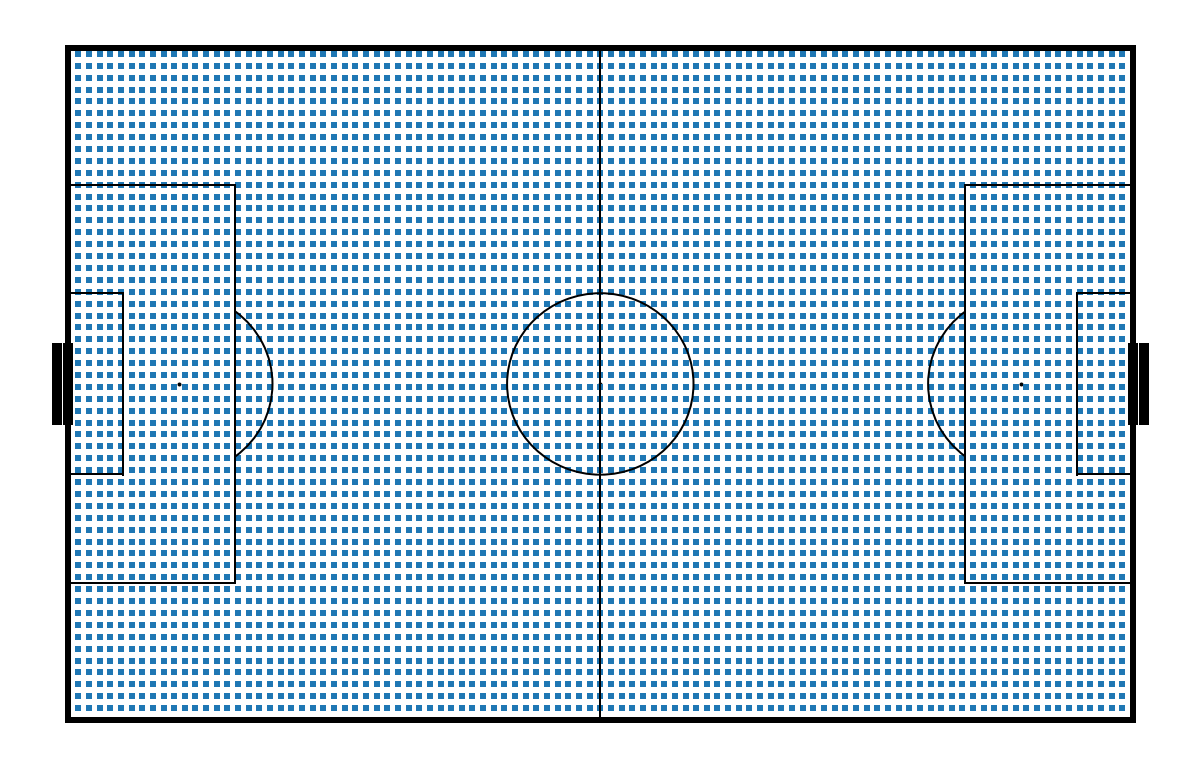

In [9]:
draw.pitch()
scouter_shots = scouter[scouter.action < 0.5]
scouter_passes = scouter[scouter.action >= 0.5]
plt.scatter(scouter_shots.x, scouter_shots.y, s = 10, c = 'C0', marker = 's', linewidth=0);
for i, row in scouter_passes.iterrows():
    if i%6 == 0:
        plt.arrow(row['x'], row['y'], 1.5*row.r/abs(row.r) * np.cos((row.a - 0.5) * 2 * np.pi), 1.5*row.r/abs(row.r) * np.sin((row.a - 0.5) * 2 * np.pi), length_includes_head = True, head_width = .7, head_length = .7, color = 'C1')